In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Daily Sea Ice Extent
# Source: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/

df = pd.read_csv('N_seaice_extent_daily_v3.0.csv', usecols=range(4), skiprows=0) # Start Nov 1st 1978

df_copy = df.copy()
df = df.iloc[4:]
df = df.astype(float)

# Remove blank spaces in column titles
df.columns = df.columns.to_series().apply(lambda x: x.strip()) 
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

g = df.groupby(['Year', 'Month'])
df = df.set_index(['Date'])

# Monthly Mean
df.resample('M').mean()

df.head()

,Year,Month,Day,Extent
Date,,,,
1978-11-01,1978.0,11.0,1.0,10.670
1978-11-03,1978.0,11.0,3.0,10.777
1978-11-05,1978.0,11.0,5.0,10.968
1978-11-07,1978.0,11.0,7.0,11.080
1978-11-09,1978.0,11.0,9.0,11.189


In [ ]:
month_lst = []
for m in range(1,13):
    month_lst.append(calendar.month_abbr[m])

years = df_copy.iloc[1:]['Year'].unique().tolist()
table_mon = df.pivot_table(values='Extent', index='Year', columns='Month') 

table_mon.columns = month_lst
table_mon.index = years
table_mon.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.645133,13.667063
1979,15.414000,16.175286,16.341938,15.446800,13.856867,12.530000,10.311250,8.041067,7.051133,8.747938,10.943067,13.336267
1980,14.861875,15.955143,16.041312,15.429067,13.792600,12.204600,10.100062,7.984267,7.667067,9.182750,11.382867,13.592933
1981,14.909688,15.604071,15.631533,15.009933,13.801625,12.429733,10.271000,7.844313,7.138467,8.856267,10.929000,13.341125
1982,15.176733,15.973500,16.043875,15.466000,13.973200,12.476067,10.367063,8.139533,7.301733,9.421062,11.627467,13.641800


Text(33.0, 0.5, 'Years')

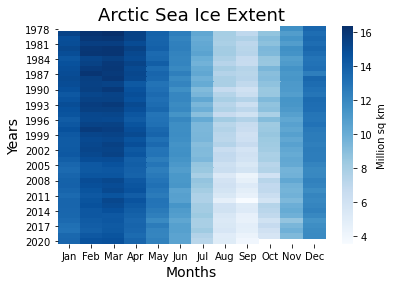

In [ ]:
sns.heatmap(table_mon, annot=False, cmap='Blues', cbar_kws={'label': 'Million sq km'})
plt.title('Arctic Sea Ice Extent', fontsize = 18)
plt.xlabel('Months', fontsize = 14) 
plt.ylabel('Years', fontsize = 14) 

Text(33.0, 0.5, 'Years')

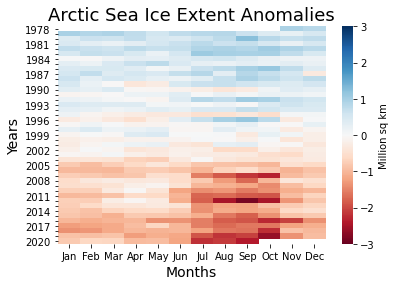

In [ ]:
# Mean over 1981-2010 (NSIDC baseline period; check why: https://www.climate.gov/news-features/understanding-climate/2013-arctic-sea-ice-minimum-compared-new-normal )
table_mean = table_mon[3:33].mean(axis=0)

new = pd.DataFrame(columns=month_lst)
new.loc[0] = table_mean

# new.iloc[np.arange(len(new)).repeat(len(years)-1)] #Repeat 43 times
anomalies = table_mon.values - new.values

plot_ = sns.heatmap(anomalies, annot=False, cmap='RdBu', cbar_kws={'label': 'Million sq km'},
            xticklabels=month_lst, yticklabels = years, center=0, vmin=-3, vmax=3)

for ind, label in enumerate(plot_.get_yticklabels()):
    if ind % 3 == 0:  # every 3th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title('Arctic Sea Ice Extent Anomalies', fontsize = 18)
plt.xlabel('Months', fontsize = 14) 
plt.ylabel('Years', fontsize = 14) 

Text(33.0, 0.5, 'Years')

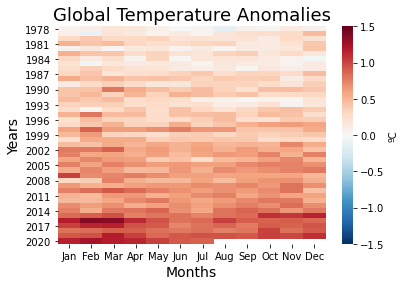

In [ ]:
# Global Temperature Anomalies with respect to 1951-1980 
# The reference period is not the same, I know.
# https://data.giss.nasa.gov/gistemp/

temp = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1, usecols=range(13))
temp = temp.iloc[98:] # From 1978
temp = temp.set_index(['Year'])
temp = temp.replace('***', np.nan)
temp = temp.astype(float)

temp_copy = temp.copy()

plot2 = sns.heatmap(temp, annot=False, cmap='RdBu_r', center=0, vmin=-1.5, vmax=1.5,
                    cbar_kws={'label': 'ºC'})
plt.title('Global Temperature Anomalies', fontsize = 18)
plt.xlabel('Months', fontsize = 14) 
plt.ylabel('Years', fontsize = 14) 

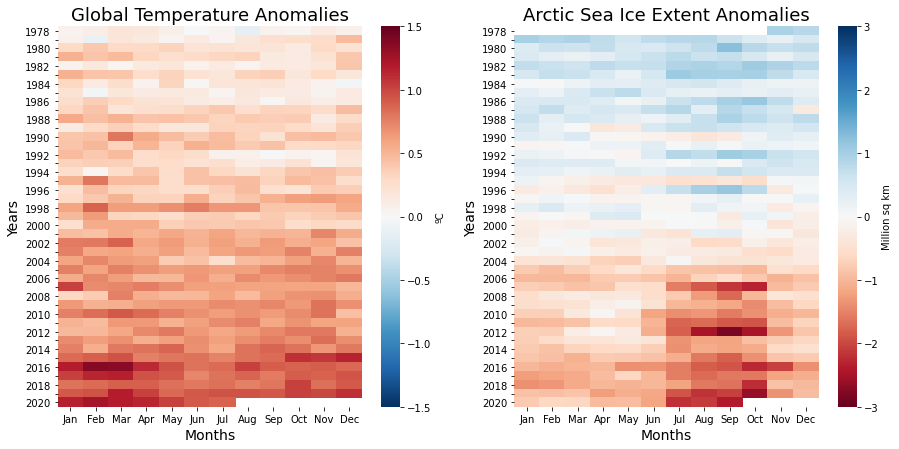

In [ ]:
# Plot the two figures together
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1, 2, 1)
plot_1 = sns.heatmap(temp, annot=False, cmap='RdBu_r', center=0, vmin=-1.5, vmax=1.5,
                    cbar_kws={'label': 'ºC'},xticklabels=month_lst, yticklabels = years,)
for ind, label in enumerate(plot_1.get_yticklabels()):
    if ind % 2 == 0:  # every 2nd label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title('Global Temperature Anomalies', fontsize = 18)
plt.xlabel('Months', fontsize = 14) 
plt.ylabel('Years', fontsize = 14) 
ax2 = plt.subplot(1, 2, 2)
plot_2 = sns.heatmap(anomalies, annot=False, cmap='RdBu', cbar_kws={'label': 'Million sq km'},
            xticklabels=month_lst, yticklabels = years, center=0, vmin=-3, vmax=3)
for ind, label in enumerate(plot_2.get_yticklabels()):
    if ind % 2 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.title('Arctic Sea Ice Extent Anomalies', fontsize = 18)
plt.xlabel('Months', fontsize = 14) 
plt.ylabel('Years', fontsize = 14) 
plt.savefig('anomaly_comparison.png')

In [ ]:
# Monthly Correlation between anomalies

ano = pd.DataFrame(anomalies, columns=month_lst)
ano.index = years

ano3 = ano.dropna() # Drop first and last rows
temp2 = temp_copy.dropna()
temp2 = temp2.iloc[1:]
# correlation = temp2['Jan'].corr(ano3['Jan']) #temp['Jan'].corr(ano['Jan'])
j = ano3.corrwith(temp2)#, drop = True, axis=0)
j #I obtain only NaN, but I don't know why

Jan   NaN
Feb   NaN
Mar   NaN
Apr   NaN
May   NaN
Jun   NaN
Jul   NaN
Aug   NaN
Sep   NaN
Oct   NaN
Nov   NaN
Dec   NaN
dtype: float64

In [ ]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
df2 = pd.DataFrame(np.random.randint(0,333,size=(100, 4)), columns=list('ABCD'))
print(df.head())
print(df2.head())
corr = df.corrwith(df2)
corr

    A   B   C   D
0  65  25  72  20
1  28  22  90  37
2  67  13  53  31
3  65  92  68  74
4  77  25   1  58
     A    B    C    D
0  137  305  190  226
1   57   12  114  190
2  203  249  308  314
3   64    8  147  216
4   52   90  315  131


A   -0.213486
B   -0.084147
C    0.057495
D    0.121475
dtype: float64